In [4]:
import pandas as pd        # importing required packages
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [16]:
iris = datasets.load_iris()     # loading the iris dataset

In [39]:
from sklearn.utils import shuffle         # creating the dataframe

df = shuffle(pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns= list(iris['feature_names']) + ['target']))

In [40]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
54,6.5,2.8,4.6,1.5,1.0
95,5.7,3.0,4.2,1.2,1.0
86,6.7,3.1,4.7,1.5,1.0
102,7.1,3.0,5.9,2.1,2.0
11,4.8,3.4,1.6,0.2,0.0
...,...,...,...,...,...
139,6.9,3.1,5.4,2.1,2.0
126,6.2,2.8,4.8,1.8,2.0
53,5.5,2.3,4.0,1.3,1.0
93,5.0,2.3,3.3,1.0,1.0


In [41]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','target']    # changing the column names

In [42]:
x = iris.data                     # assigning the training data into x variable

In [43]:
y = iris.target                   # assigning the target into y variable

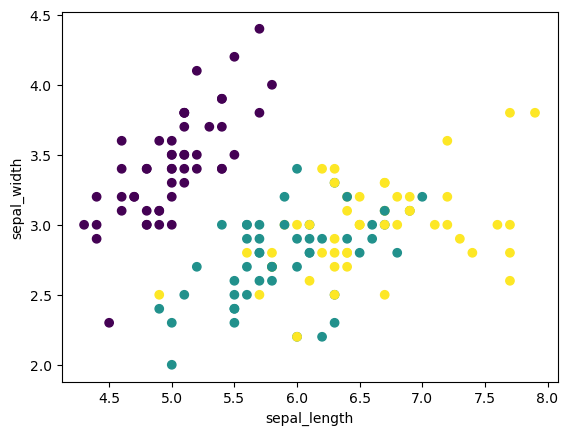

In [46]:
from matplotlib import pyplot
pyplot.scatter(df['sepal_length'],df['sepal_length'],c=df['target'])    # plotting the graph between sepal_length and sepal_length
pyplot.xlabel('sepal_length')
pyplot.ylabel('sepal_width')
pyplot.show()

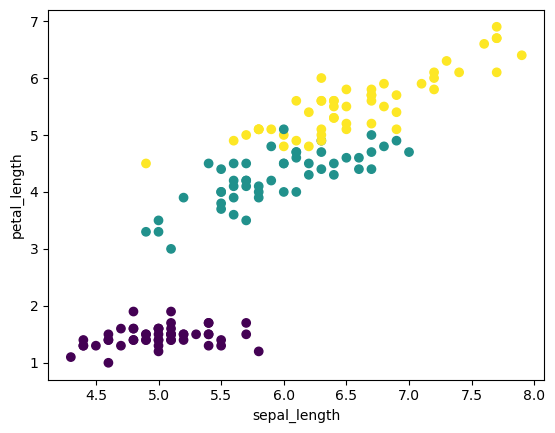

In [47]:
 # plotting the graph between sepal_length and petal_length
pyplot.scatter(df['sepal_length'],df['petal_length'],c=df['target'])
pyplot.xlabel('sepal_length')
pyplot.ylabel('petal_length')
pyplot.show()

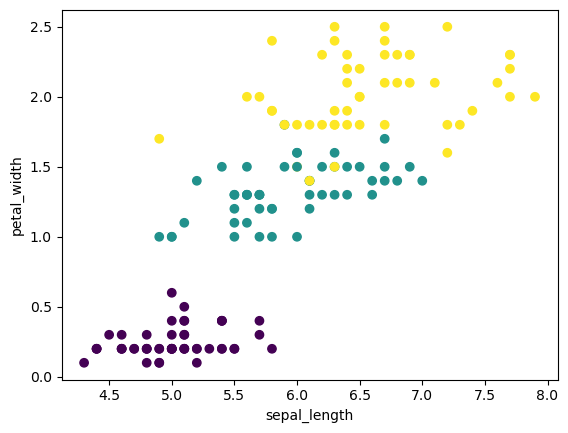

In [48]:
 # plotting the graph between sepal_length and petal_width
pyplot.scatter(df['sepal_length'],df['petal_width'],c=df['target'])
pyplot.xlabel('sepal_length')
pyplot.ylabel('petal_width')
pyplot.show()

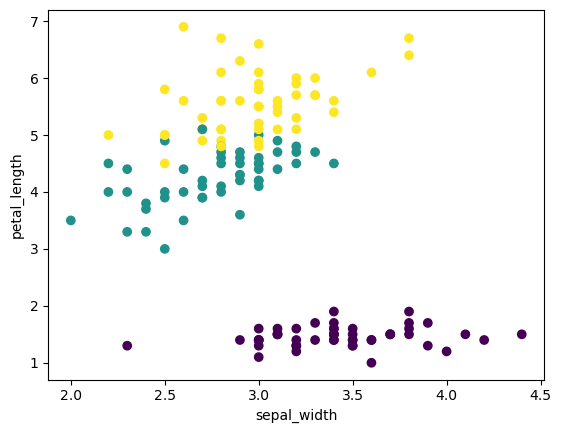

In [49]:
 # plotting the graph between sepal_width and petal_length
pyplot.scatter(df['sepal_width'],df['petal_length'],c=df['target'])
pyplot.xlabel('sepal_width')
pyplot.ylabel('petal_length')
pyplot.show()

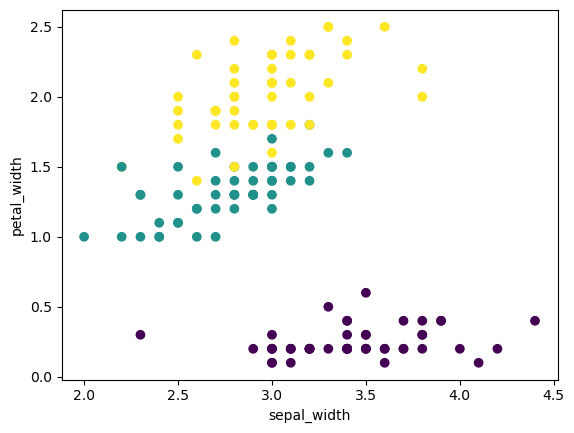

In [50]:
 # plotting the graph between sepal_width and petal_width
pyplot.scatter(df['sepal_width'],df['petal_width'],c=df['target'])
pyplot.xlabel('sepal_width')
pyplot.ylabel('petal_width')
pyplot.show()

In [112]:
from sklearn.model_selection import train_test_split    # splitting the data into training , validation, testing sets
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size = 0.3)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp)

In [113]:
print(len(x_train))  # printing the length od each set
print(len(x_val))
print(len(x_test))

105
33
12


In [114]:
lr = LogisticRegression(C = 0.01)   # creating the model
lr.fit(x_train,y_train)

LogisticRegression(C=0.01)

In [115]:
y_pred = lr.predict(x_train)  # predicting the values

In [116]:
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0,
       1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 2])

In [117]:
a =sum(y_pred == y_train)       # checking the predicted values with original values
a

99

In [118]:
print(a , '/', len(y_train))    

99 / 105


In [119]:
lr.score(x_train,y_train)

0.9428571428571428

In [120]:
y_val_pred = lr.predict(x_val)   # checking the predicted values with original values

In [121]:
y_val_pred == y_val

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True])

In [122]:
b = sum(y_val == y_val)

In [123]:
print(b , '/', len(y_val))

33 / 33


In [124]:
from sklearn.metrics import confusion_matrix        # printing the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred)
conf_matrix

array([[31,  0,  0],
       [ 0, 35,  4],
       [ 0,  2, 33]])

In [125]:
conf_matrix = confusion_matrix(y_val, y_val_pred)     # printing the confusion matrix
conf_matrix 

array([[13,  0,  0],
       [ 0,  6,  4],
       [ 0,  0, 10]])

#### Regularization with different C values

[[ 9  4  0]
 [ 0 10  0]
 [ 0  7  3]]
[[13  0  0]
 [ 0 10  0]
 [ 0  3  7]]
[[13  0  0]
 [ 0  8  2]
 [ 0  1  9]]
[[13  0  0]
 [ 0  6  4]
 [ 0  0 10]]


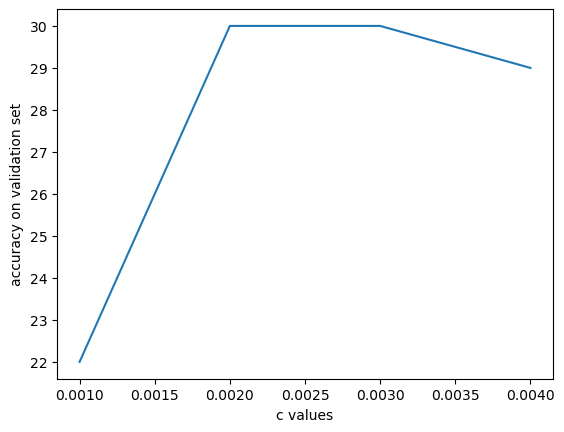

In [131]:
c_values = [0.001,0.002,0.003,0.004]
li = np.zeros(4)
index = 0
for i in c_values:
    lr1 = LogisticRegression(C = i,max_iter = 500)
    lr1.fit(x_train,y_train)
    y_val_pred1 = lr1.predict(x_val)
    #print(y_val_pred1)
    c = sum(y_val_pred1 == y_val)
    #print(c)
    li[index] = c
    index += 1
    conf_matrix = confusion_matrix(y_val, y_val_pred1)
    print(conf_matrix)
pyplot.plot(c_values,li)   
pyplot.xlabel('c values')
pyplot.ylabel('accuracy on validation set')    # plotting the graph for different C values and accuracy
pyplot.show()


#### we can see that for the c value of 0.002 the accuracy is high
